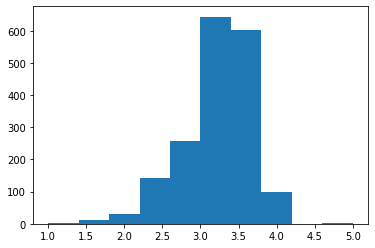

['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'Acalli', 'Acalli', 'Adi', 'Adi', 'Adi', 'Adi', 'Aequare (Gianduja)', 'Aequare (Gianduja)', 'Ah Cacao', "Akesson's (Pralus)", "Akesson's (Pralus)", "Akesson's (Pralus)", 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alexandre', 'Alexandre', 'Alexandre', 'Alexandre', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller 

       Company  Rating  CocoaPercentage
0     A. Morin    3.75             63.0
1     A. Morin    2.75             70.0
2     A. Morin    3.00             70.0
3     A. Morin    3.50             70.0
4     A. Morin    3.50             70.0
...        ...     ...              ...
1790    Zotter    3.75             70.0
1791    Zotter    3.00             65.0
1792    Zotter    3.50             65.0
1793    Zotter    3.25             62.0
1794    Zotter    3.00             65.0

[1795 rows x 3 columns]


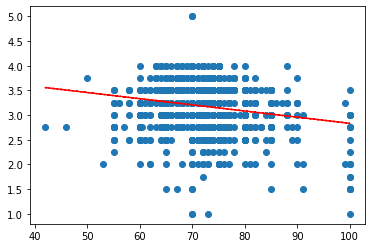

In [3]:
#import codecademylib3_seaborn
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

webpage_response = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
soup = BeautifulSoup(webpage_response.content, "html.parser")

# Finding all tag with class: "Rating":
ratings_tag = soup.select(".Rating")
#print(ratings_tag)

# Creating a list of all the rating values:
ratings = []
for rating in range(1, len(ratings_tag)):
  soup_1 = ratings_tag[rating]
  ratings.append(float(soup_1.get_text()))

#print(ratings)

# Creating a histogram of the ratings values:
ratings_hist = plt.hist(ratings)
plt.show(ratings_hist)

# Finding all tag with class: "Company":
company_tag = soup.select(".Company")
#print(company_tag)

# Creating a list of all the company values:
companies = []
for company in range(1, len(company_tag)):
  soup_1 = company_tag[company]
  companies.append(soup_1.get_text())

print(companies)

#Creating a DataFrame for Companies and Ratings:
dict_data = {"Company":companies, "Rating":ratings}
df = pd.DataFrame.from_dict(dict_data)

company_ratings = df.groupby("Company").Rating.mean().reset_index()
print(company_ratings)

# Top 10 highest rated chocolate companies
print(company_ratings.nlargest(10, "Rating").reset_index(drop=True))

# Creating a list of all the cocoa percent values:
cocoa_percent_tag = soup.select(".CocoaPercent")
#print(cocoa_percent_tag)
cocoa_percent = []
for percent in range(1, len(cocoa_percent_tag)):
  soup_1 = cocoa_percent_tag[percent]
  cocoa_percent.append(float(soup_1.get_text().strip("%")))

#print(cocoa_percent)

#Adding "CocoacoaPercentage" column to the DataFrame:
df["CocoaPercentage"] = cocoa_percent
print(df)

scatter_1 = plt.scatter(df.CocoaPercentage, df.Rating)
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show(scatter_1)